In [0]:
!pip install helper

In [0]:
from torch import nn
import torch.nn.functional as F

In [0]:
import torch
import helper
from torchvision import datasets,transforms

In [0]:
transform =transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [0]:
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=True,transform=transform)

In [0]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [0]:
images,labels = next(iter(trainloader))

In [0]:
testset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=False,transform = transform)

In [0]:
testloader = torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

In [0]:
helper.imshow(image[0,:])

AttributeError: ignored

In [0]:
images = images.view(image.shape[0],-1)

In [0]:
model =  nn.Sequential(nn.Linear(784,128),
                       nn.ReLU(),
                       nn.Linear(128,64),
                       nn.ReLU(),
                       nn.Linear(64,10),
                       nn.LogSoftmax(dim=1)
                       )

In [0]:
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

In [0]:
criterion = nn.CrossEntropyLoss()

In [0]:
from torch import optim

In [0]:
optimizer=optim.SGD(model.parameters(),lr=0.01)

In [0]:
optimizer.zero_grad()

In [0]:
epochs =10

In [0]:
images = images.view(images.shape[0],-1)

In [0]:
output  = model(images)
#loss = criterion(output,labels)

In [0]:
loss = criterion(output,labels)

In [0]:
for e in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    images = images.view(images.shape[0],-1)
    output  = model(images)
    loss = criterion(output,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  else:
    print(f"Training loss : {running_loss/len(trainloader)}")


Training loss : 1.03253202670927
Training loss : 0.5596380642355124
Training loss : 0.49219837721222753
Training loss : 0.4572562481612285
Training loss : 0.4361040144205602
Training loss : 0.4194695613404581
Training loss : 0.4057470958497224
Training loss : 0.39298234797362835
Training loss : 0.3822464079522629
Training loss : 0.37325533382546927


In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

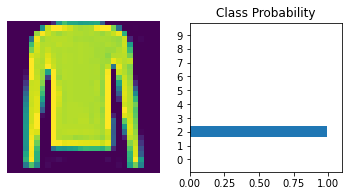

In [0]:
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)